In [71]:
import pandas as pd

In [72]:
df = pd.read_csv('2018_daily_complete_weather_data_0.csv', parse_dates=['odate'])

In [73]:
df.head()

,row_id,district,mandal,location,odate,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
0,0,Medchal-Malkajgiri,Uppal,Moulali,2018-01-01,0.0,12.1,32.6,23.8,100.0,0.0,6.6
1,1,Medchal-Malkajgiri,Uppal,Moulali,2018-02-01,0.0,11.6,32.6,23.2,100.0,0.0,4.7
2,2,Medchal-Malkajgiri,Uppal,Moulali,2018-03-01,0.0,13.0,33.0,31.5,100.0,0.0,6.3
3,3,Medchal-Malkajgiri,Uppal,Moulali,2018-04-01,0.0,9.7,31.7,27.4,100.0,0.0,5.2
4,4,Medchal-Malkajgiri,Uppal,Moulali,2018-05-01,0.0,8.8,31.0,28.6,100.0,0.0,7.1


In [74]:
df = df.drop('row_id', axis=1)

In [75]:
df.describe()

,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
count,318132.000000,318128.000000,318128.000000,318090.000000,318087.000000,311197.000000,311197.000000
mean,1.933995,21.635103,34.134850,41.458775,82.988885,0.287033,9.900205
std,8.572793,4.497836,4.051318,19.420700,14.686176,1.195849,6.036967
min,0.000000,2.700000,16.700000,0.100000,4.000000,0.000000,0.000000
25%,0.000000,18.600000,31.400000,26.200000,73.700000,0.000000,5.900000
50%,0.000000,22.600000,34.000000,38.500000,85.700000,0.000000,9.200000
75%,0.000000,24.800000,36.800000,53.800000,96.200000,0.000000,13.300000
max,303.800000,87.600000,45.400000,99.900000,100.000000,24.700000,69.000000


In [76]:
len(df['district'].unique())

31

In [77]:
len(df['mandal'].unique())

630

In [78]:
len(df['location'].unique())

1637

In [79]:
df['address'] = df.district.str.cat(df.mandal, sep=', ').str.cat(df.location, sep=', ')

In [80]:
df.head()

,district,mandal,location,odate,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,address
0,Medchal-Malkajgiri,Uppal,Moulali,2018-01-01,0.0,12.1,32.6,23.8,100.0,0.0,6.6,"Medchal-Malkajgiri, Uppal, Moulali"
1,Medchal-Malkajgiri,Uppal,Moulali,2018-02-01,0.0,11.6,32.6,23.2,100.0,0.0,4.7,"Medchal-Malkajgiri, Uppal, Moulali"
2,Medchal-Malkajgiri,Uppal,Moulali,2018-03-01,0.0,13.0,33.0,31.5,100.0,0.0,6.3,"Medchal-Malkajgiri, Uppal, Moulali"
3,Medchal-Malkajgiri,Uppal,Moulali,2018-04-01,0.0,9.7,31.7,27.4,100.0,0.0,5.2,"Medchal-Malkajgiri, Uppal, Moulali"
4,Medchal-Malkajgiri,Uppal,Moulali,2018-05-01,0.0,8.8,31.0,28.6,100.0,0.0,7.1,"Medchal-Malkajgiri, Uppal, Moulali"


In [81]:
unique_addresses = df['address'].unique()

dataframe_list = []
for address in unique_addresses:
    dataframe_list.append(df[df['address'] == address])

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
def plot_temp_max(index):
    plt.figure(figsize=(18,10))
    sns.set(rc={'axes.facecolor':'#eaeaf2','figure.facecolor':'#eaeaf2'})
    sns.lineplot(x=dataframe_list[index]['odate'], y=dataframe_list[index]['temp_max'], label='temp_max').set_title(dataframe_list[index]['address'].iloc[0])

In [83]:
sample_df = dataframe_list[199]
sample_df.columns

Index(['district', 'mandal', 'location', 'odate', 'cumm_rainfall', 'temp_min',
       'temp_max', 'humidity_min', 'humidity_max', 'wind_speed_min',
       'wind_speed_max', 'address'],
      dtype='object')

### Timeseries graphs for Temperature, Humidity and Wind Speed

In [91]:
sample_df.head(2)

,district,mandal,location,odate,cumm_rainfall,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max,address
54725,Mancherial,Kasipet,Kondapur,2018-01-01,0.0,12.2,34.9,21.4,84.9,0.0,6.1,"Mancherial, Kasipet, Kondapur"
54726,Mancherial,Kasipet,Kondapur,2018-02-01,0.0,12.4,34.3,23.4,83.6,0.0,6.5,"Mancherial, Kasipet, Kondapur"


<AxesSubplot: xlabel='odate', ylabel='temp_max'>

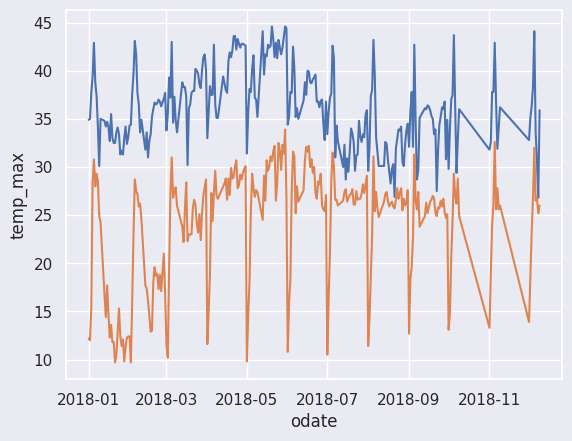

In [102]:
sns.lineplot(data = sample_df, 
            x = 'odate', 
            y = 'temp_max',)

sns.lineplot(data = sample_df,
            x = 'odate',
            y = 'temp_min',)


In [103]:
sample_df['temp_avg'] = (sample_df['temp_max'] + sample_df['temp_min'])/2

/tmp/ipykernel_342335/4097480355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['temp_avg'] = (sample_df['temp_max'] + sample_df['temp_min'])/2


In [107]:
sns.lineplot(sample_df['odate'], sample_df['temp_avg'])

TypeError: lineplot() takes from 0 to 1 positional arguments but 4 were given